## Netflix EDA with Python

_________________

#### Introduction
This dataset can be found at [kaggle: Netflix - Exploratory Data Analysis](https://www.kaggle.com/datasets/swatikhedekar/exploratory-data-analysis-on-netflix-data) and has over 8,000 entries between 2008 and 2021. This exploratory data analysis focuses on demonstrating python skills through data wrangling, data cleaning, analysis, and visualization. 
_________________


#### Table of Contents
* [Asking Questions](#1.-Asking-Questions)
* [Data Wrangling](#2.-Data-Wrangling)
* [Data Cleaning](#3.-Data-Cleaning)
* [Data Exploration and Visualization](#4.-Data-Exploration-and-Visualization)
* [Conclusion](#5.-Conclusion)
_________________

### 1. Asking Questions

Based on our dataset, we're interested in answering these questions:
* What's the Makeup of Movies and TV Shows on Netflix?
* What's the Distribution of Ratings?
* What Year Did Netflix Add the Most Titles?
* Do Certain Months Have a Higher or Lower Number of Film Added?
* What are the Top 10 Countries Where Netflix's Films are Made?
* What are the Top 10 Genres for Movies and TV Shows?
_________________

### 2. Data Wrangling
Let's set up the environment and load our dataset.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

In [3]:
# Importing dataset
netflix = pd.read_csv('C:/Users/Mads/Desktop/SQL Portfolio/Netflix/netflix_titles_2021.csv')

#### Assessing Dataset
For this part we'll be viewing the dataset for basic information.

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.nunique()

show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

#### Converting column ```date_added```
Now that we've gotten to know our data, let's by converting our column ```date_added``` to datetime.

In [14]:
netflix['date_added'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8787 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8787 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.3 KB


In [15]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['date_added'].info()

<class 'pandas.core.series.Series'>
Int64Index: 8787 entries, 0 to 8806
Series name: date_added
Non-Null Count  Dtype         
--------------  -----         
8787 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 137.3 KB


#### Adding columns ```year_added``` and ```month_added```
To aid our analysis down the line, we'll be adding columns ```year_added``` and ```month_added```.

In [16]:
year_added = pd.DatetimeIndex(netflix['date_added']).year
month_added = pd.DatetimeIndex(netflix['date_added']).month

netflix['year_added'] = year_added
netflix['month_added'] = month_added

netflix.tail(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,11
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,1
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3


<br>

_________________

### 3. Data Cleaning
Now that we've gotten to know our data, let's start cleaning by checking for null values.

In [8]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<br>

Notice that there's over 2000 missing values for column ```director```. Before dropping records with NaN values for ```director```, let's find out why there's so many null values in ```director```.

In [9]:
# Finding entries that have NaN value for director and is a tv show
missing_director = netflix[(netflix['director'].isnull()) & (netflix['type'] == 'TV Show')]
missing_director.value_counts()

tv_shows = netflix['type'] == 'TV Show' #Counting the total tv show entries

total_tv_shows = tv_shows.value_counts().loc[True]
count_missing_director = len(missing_director)

print(f"Total number of TV Shows: {total_tv_shows}")
print(f"Number of TV Shows with Missing Directors: {count_missing_director}")

Total number of TV Shows: 2676
Number of TV Shows with Missing Directors: 2446


<br>

It appears that 90% of TV Shows have a null value for ```director```. Unlike movies, tv shows tend to have different directors for each episode. Which would account for the overwhelming majority of missing values. If we had dropped records with a null value for ```director```, our analysis would've showed bias towards records with a Movie ```type```.

For this reason, we'll replace the NaN values with "Unknown" in columns ```director```, ```cast```, and ```country```. As for columns that have very few NaN values, ```date_added```, ```rating```, and ```duration```, we will be dropping.

In [5]:
# Dropping NaN values for these colums
netflix.dropna(subset=['date_added','rating','duration'], inplace=True)

#Replacing NaN with 'Unknown'
netflix['director'] = netflix['director'].fillna('Unknown') 
netflix['cast'] = netflix['cast'].fillna('Unknown')
netflix['country'] = netflix['country'].fillna('Unknown')

_________________
Now we can check for duplicates.

In [6]:
netflix[netflix.duplicated(subset=['title'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5964,s5965,TV Show,9-Feb,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",Unknown,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,2019-03-29,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


In [7]:
netflix = netflix.drop_duplicates(subset=['title'],keep='first')

netflix[netflix.duplicated(subset=['title'])] # After dropping duplicates

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


_________________

Before moving onto data wrangling, let's get into ```rating```.

In [13]:
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

<br>
Note that UR stands for Unrated and is the equivalent to NR, Not Rated. We'll go ahead and standardize UR to NR. 

In [8]:
netflix.replace(to_replace={'rating':'UR'}, value='NR', inplace=True)
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2155
TV-PG        861
R            798
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            82
G             41
TV-Y7-FV       6
NC-17          3
Name: rating, dtype: int64

_________________
#### 4. Data Exploration and Visualization 
    a.) What's the Makeup of Movies and TV Shows on Netflix?
    b.) What's the Distribution of Ratings?
    c.) What Year Did Netflix Add the Most Titles?
    d.) Do Certain Months Have a Higher or Lower Number of Film Added?
    e.) What are the Top 10 Countries Where Netflix's Films are Made?
    f.) What are the Top 10 Genres for Movies and TV Shows?
 
_________________

#### a.) What's the Makeup of Movies and TV Shows on Netflix?


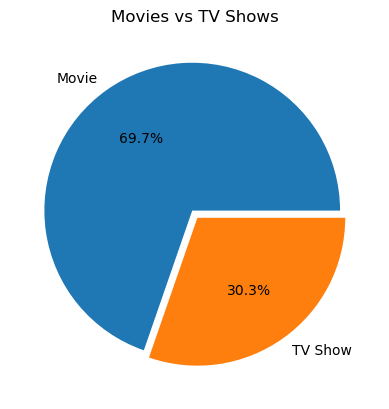

In [24]:
n_type = netflix['type'].value_counts() #Counting movie and shows

plt.pie(data=netflix, x=n_type, labels=n_type.index, autopct='%.1f%%', explode=[0.03,0.03])
plt.title('Movies vs TV Shows')
plt.show()

Here we see that movies make up almost 70% of the dataset. This tells us our analysis is skewed entries that are movies.

_________________
#### b.) What's the Distribution of Ratings?

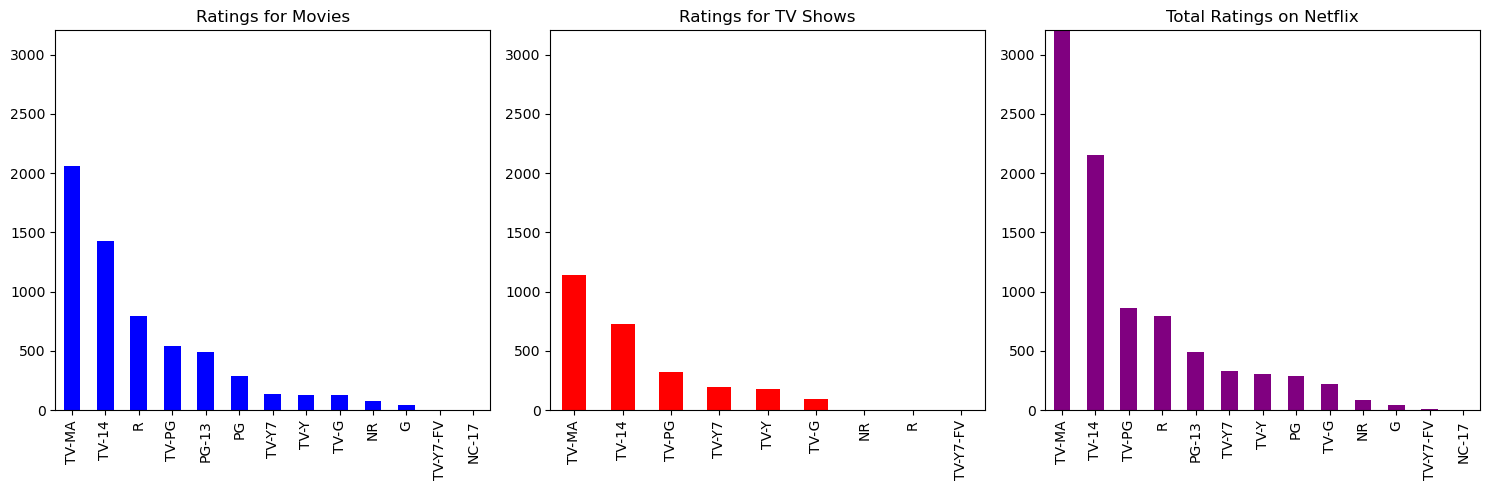

In [89]:
net_movies = netflix[netflix['type'] == 'Movie']
net_shows = netflix[netflix['type'] == 'TV Show']

#Series for counting ratings for movies and shows
mrating_count = net_movies['rating'].value_counts() #movie rating count
srating_count = net_shows['rating'].value_counts() #show rating count
total_counts = netflix['rating'].value_counts() #total rating count

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))  # Create subplots
# Plot for each subplot
mrating_count.plot(kind='bar', ax=ax1, title='Ratings for Movies', rot=90, color='blue')
srating_count.plot(kind='bar', ax=ax2, title='Ratings for TV Shows', rot=90, color='red')
total_counts.plot(kind='bar', ax=ax3, title='Total Ratings on Netflix', rot=90, color='purple')

# Set a common y-axis range for all subplots
common_ylim = max(mrating_count.max(), srating_count.max(), total_counts.max()) # Finding max y limit
ax1.set_ylim(0, common_ylim)
ax2.set_ylim(0, common_ylim)
ax3.set_ylim(0, common_ylim)

plt.tight_layout()  
plt.show()

The ratings that appear the most on Netflix is TV-MA, TV-14, and TV-PG in that respective order. With so many TV-MA and TV-14 ratings we see Netflix is catering more to its teen and adult audience.
_________________

#### c.) What Year Did Netflix Add the Most Titles?

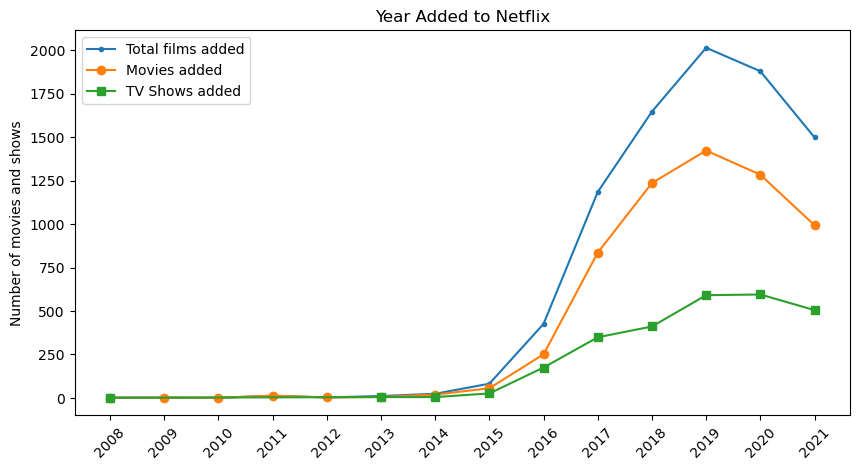

In [12]:
#Showing the frequency of titles added by date
total_date_counts = netflix['year_added'].value_counts().sort_index()

# Finding movie and shows added date
m_date_counts = netflix[netflix['type']=='Movie']
m_date_counts = m_date_counts['year_added'].value_counts().sort_index()
s_date_counts = netflix[netflix['type']=='TV Show']
s_date_counts = s_date_counts['year_added'].value_counts().sort_index()

plt.figure(figsize=(10,5))
total_date_counts.plot(x='year_added', kind='line',marker='.', label='Total films added', title='Year Added to Netflix', ylabel='Number of movies and shows')
m_date_counts.plot(label='Movies added',marker='o')
s_date_counts.plot(label='TV Shows added',marker='s')

plt.xticks(total_date_counts.index, rotation=45)
plt.legend(loc="upper left")
plt.show()

The year with the most titles added is 2018. We see a steep increase starting in 2016, from around 500 titles added to 2000 in 2018. After 2018 we see a slight decrease by 2019, and more so in 2020. 

Between 2013 and 2015 we see movies and shows were added at a similar rate. However, after 2016 Netflix priortized adding movies, contributing to the steep rise of added titles. 
_________________

#### d.) Do Certain Months Have a Higher or Lower Number of Film Added?

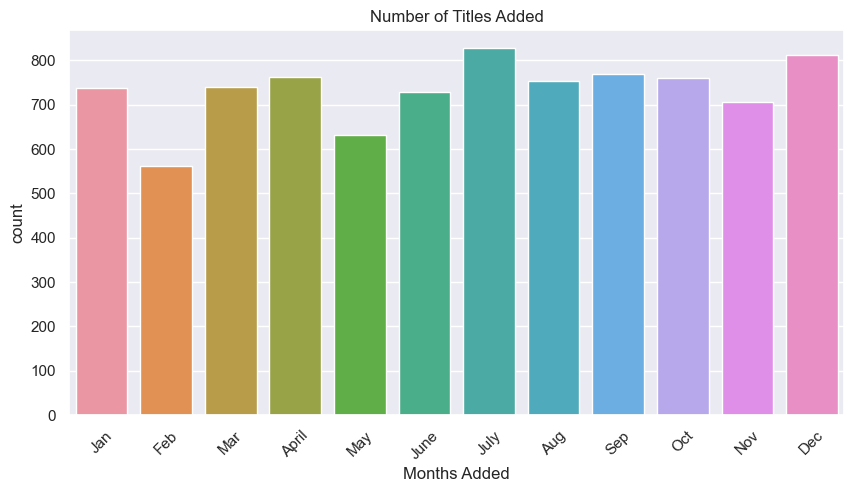

In [165]:
month_added = sns.countplot(x='month_added',data=netflix)
sns.set(rc={'figure.figsize':(10,5)})
month_added.set_xlabel('Months Added')
month_added.set_title('Number of Titles Added')
month_added.set_xticklabels(
            labels = ['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec'], 
            rotation=45)
plt.show()

The month with the highest number of added titles is July, and the month with the lowest is Feburary. While the lowest month is Feburary, it should be noted that Feburary is the shortest month. While two days wouldn't make a drastic difference in titles added, the discrepancy may not be as big otherwise.
_________________

#### e.) What are the Top 10 Countries Where Netflix's Films are Made?

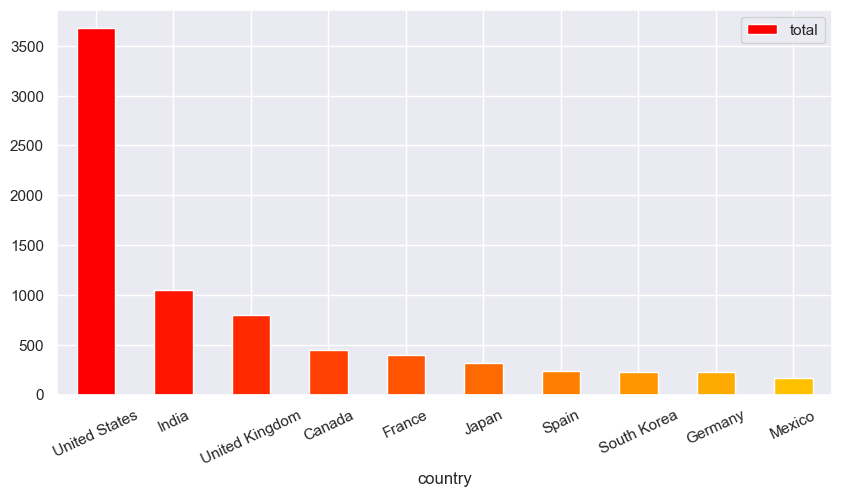

In [251]:
n1 = netflix[netflix['country'] != 'Unknown'] # Dropping entries with 'Unknown' country
countries = ', '.join(n1['country']).split(', ')

cntry_list = Counter(countries).most_common(10) 
df_cntry = pd.DataFrame(cntry_list) # Converting to dataframe
df_cntry = df_cntry.rename(columns={0: 'country', 1:'total'})

color_map = plt.colormaps.get_cmap('autumn')
df_cntry.plot(x='country',y='total',kind='bar',rot=25,color=[color_map(i) for i in np.linspace(0, 1, len(rating_counts))])
plt.show()

United States is the top country where films on Netflix were made. The next top countries are India, United Kingdom, and Canada respectively. 

_________________
#### f.) What are the Top 10 Genres for Movies and TV Shows?

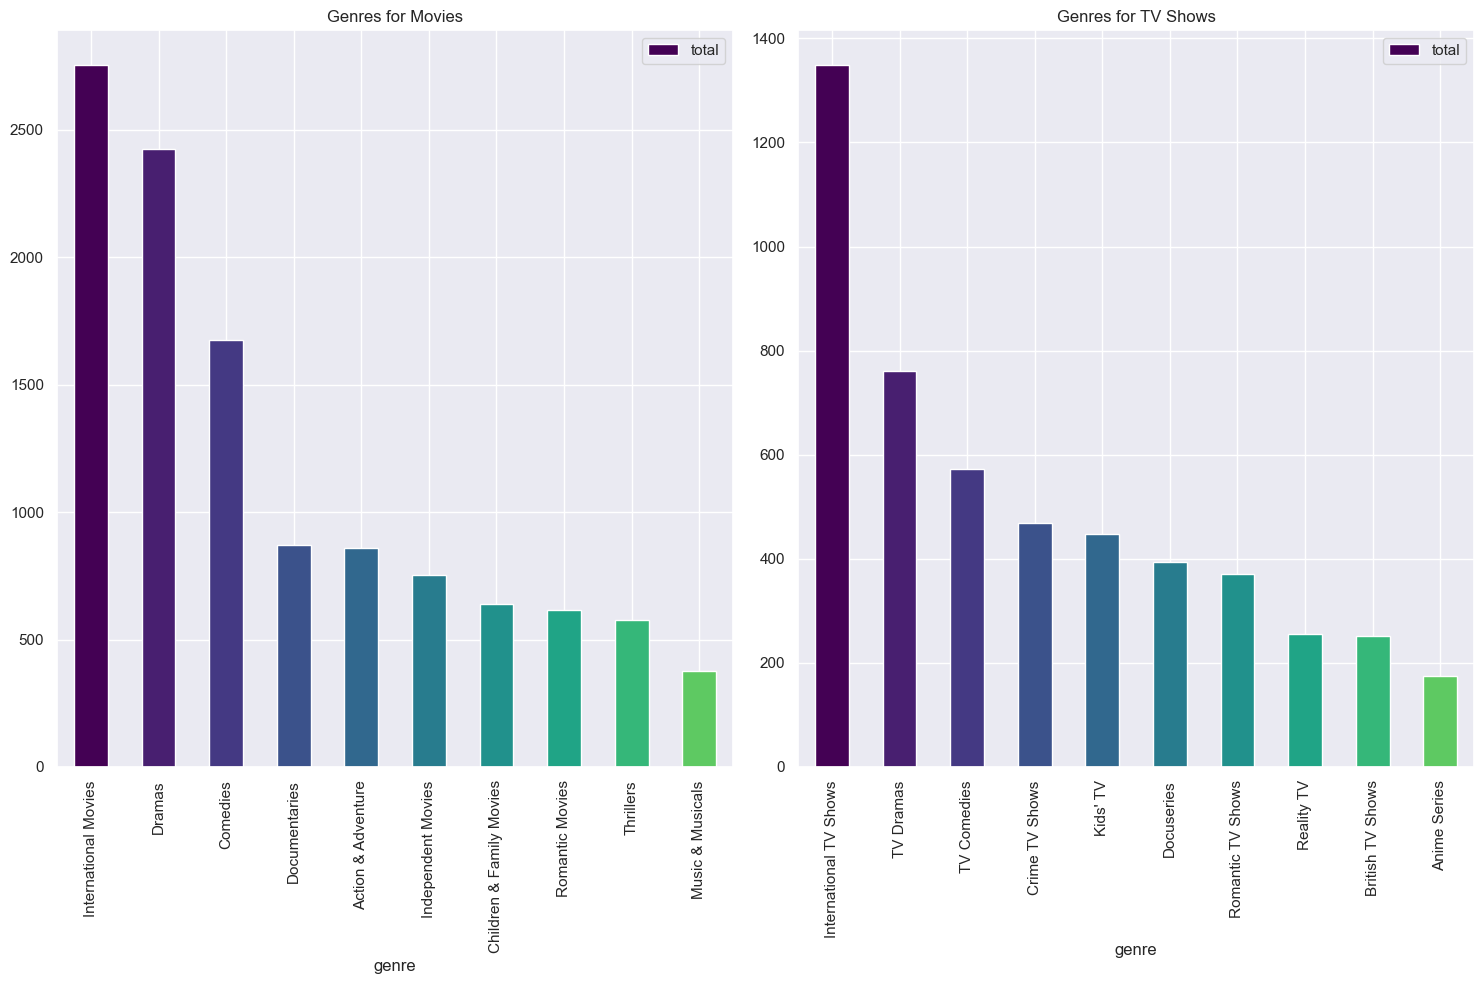

In [285]:
n_movies = netflix[netflix['type']=='Movie']
n_shows = netflix[netflix['type']=='TV Show']

movie_gen = ', '.join(n_movies['listed_in']).split(', ')
show_gen = ', '.join(n_shows['listed_in']).split(', ')

movie_list = Counter(movie_gen).most_common(10) 
show_list = Counter(show_gen).most_common(10) 

df_m_gen = pd.DataFrame(movie_list) # Converting to dataframe
df_m_gen = df_m_gen.rename(columns={0: 'genre', 1:'total'})
df_s_gen = pd.DataFrame(show_list) # Converting to dataframe
df_s_gen = df_s_gen.rename(columns={0: 'genre', 1:'total'})

color_map = plt.colormaps.get_cmap('viridis')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))  # Create subplots
df_m_gen.plot(x='genre',y='total',kind='bar', ax=ax1, title='Genres for Movies', rot=90,color=[color_map(i) for i in np.linspace(0, 1, len(rating_counts))])
df_s_gen.plot(x='genre',y='total',kind='bar', ax=ax2, title='Genres for TV Shows', rot=90,color=[color_map(i) for i in np.linspace(0, 1, len(rating_counts))])

# Set x-axis tick labels for each subplot
ax1.set_xticklabels(df_m_gen['genre'], rotation=90)
ax2.set_xticklabels(df_s_gen['genre'], rotation=90)

plt.tight_layout()  
plt.show()

The top 3 genres for both movies and tv shows is international, dramas, and comedies respectively.

_________________
### 5. Conclusion
**Let's look back on our questions and summarize our findings:** <br>


* **What's the Makeup of Movies and TV Shows on Netflix?**
> Movies make up nearly 70% of Netflix's titles and TV shows only make up 30%.
* **What's the Distribution of Ratings?**
> For both movies and TV shows, Netflix caters more towards a mature audience. The top leading rating for both entries were TV-MA and TV-14.
* **What Year Did Netflix Add the Most Titles?**
> Netflix added the most titles in 2018.
* **Do Certain Months Have a Higher or Lower Number of Film Added?**
> The month with the highest amount of added titles was July, closely follwed by December. The Month with the lowest was Feburary, which can be reasoned by being the shortest month of the year.
* **What are the Top 10 Countries Where Netflix's Films are Made?**
> The country with the majority of movies was the United States with more than 2,000 leading entries than the 2nd highest country, India.
* **What are the Top 10 Genres for Movies and TV Shows?**
> For both movies and TV shows, the top 3 genres were international, dramas, and comedies in that same order for both types.

<br>

### Thanks for taking the time to check out this project! Feel free to reach out with any feedback or questions.